In [1]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, loadMCSamples, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
from matplotlib import rc
import seaborn as sns
from scipy.constants import c
import pandas as pd
import numpy as np
from scipy.special import gamma, factorial, erfinv
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import os,sys


camb_installation_path = '/Users/SM1WG/Research/Cosmology/Codes/Theory/CAMB/'
camb_path = os.path.realpath(os.path.join(os.getcwd(),camb_installation_path))
sys.path.insert(0,camb_path)

import camb
from camb import model

In [2]:
def get_chi2(root):
    
    chain_1=pd.read_csv(root+'.1.txt', sep='\s+')
    chain_1=pd.read_csv(root+'.1.txt', sep='\s+',header=None, skiprows=1, names=chain_1.keys()[1:len(chain_1.keys())])
        
    chain_2=pd.read_csv(root+'.2.txt', sep='\s+')
    chain_2=pd.read_csv(root+'.2.txt', sep='\s+',header=None, skiprows=1, names=chain_2.keys()[1:len(chain_2.keys())])

    chain_3=pd.read_csv(root+'.3.txt', sep='\s+')
    chain_3=pd.read_csv(root+'.3.txt', sep='\s+',header=None, skiprows=1, names=chain_3.keys()[1:len(chain_3.keys())])

    chain_4=pd.read_csv(root+'.4.txt', sep='\s+')
    chain_4=pd.read_csv(root+'.4.txt', sep='\s+',header=None, skiprows=1, names=chain_4.keys()[1:len(chain_4.keys())])

    return min(min(chain_1["chi2"]) , min(chain_2["chi2"]), min(chain_3["chi2"]), min(chain_4["chi2"]))

In [3]:
def get_bestfit(root):
    
    chain_1=pd.read_csv(root+'.1.txt', sep='\s+')
    chain_1=pd.read_csv(root+'.1.txt', sep='\s+',header=None, skiprows=1, names=chain_1.keys()[1:len(chain_1.keys())])
    print('reading', root+'.1.txt',end=' ')
    min_chain1=min(chain_1["chi2"])
    print('( min(chi2) of this chain:', min_chain1,')')

    chain_2=pd.read_csv(root+'.2.txt', sep='\s+')
    chain_2=pd.read_csv(root+'.2.txt', sep='\s+',header=None, skiprows=1, names=chain_2.keys()[1:len(chain_2.keys())])
    print('reading', root+'.2.txt',end=' ')
    min_chain2=min(chain_2["chi2"])
    print('( min(chi2) of this chain:', min_chain2,')')

    chain_3=pd.read_csv(root+'.3.txt', sep='\s+')
    chain_3=pd.read_csv(root+'.3.txt', sep='\s+',header=None, skiprows=1, names=chain_3.keys()[1:len(chain_3.keys())])
    print('reading', root+'.3.txt',end=' ')
    min_chain3=min(chain_3["chi2"])
    print('( min(chi2) of this chain:', min_chain3,')')

    chain_4=pd.read_csv(root+'.4.txt', sep='\s+')
    chain_4=pd.read_csv(root+'.4.txt', sep='\s+',header=None, skiprows=1, names=chain_4.keys()[1:len(chain_4.keys())])
    print('reading', root+'.4.txt',end=' ')
    min_chain4=min(chain_4["chi2"])
    print('( min(chi2) of this chain:', min_chain4,')\n')

    min_chi2=min(min(chain_1["chi2"]) , min(chain_2["chi2"]), min(chain_3["chi2"]), min(chain_4["chi2"]))
    

    if min_chi2 == min_chain1:
        min_chain = chain_1
        print('bestfit in', root+'.1.txt with',min_chi2,'\n')
    if min_chi2 == min_chain2:
        min_chain = chain_2
        print('bestfit in', root+'.2.txt with',min_chi2,'\n')
    if min_chi2 == min_chain3:
        min_chain = chain_3
        print('bestfit in', root+'.3.txt with',min_chi2,'\n')
    if min_chi2 == min_chain4:
        min_chain = chain_4
        print('bestfit in', root+'.4.txt with',min_chi2,'\n')
    
    
    best_fit_loc=int(np.where(min_chain["chi2"]==min(min_chain["chi2"]))[0])

    best_fit=min_chain.iloc[best_fit_loc,:]
    
    
    #print('w=', chain_1['w'])
    #print('wa=',chain_1['wa'])
    
    return best_fit

In [4]:
def get_distances(root,rdrag):
    
    #c=(2.998 * 10**5)
    background=np.loadtxt(root)
    z =  background[:,0]
    H =  background[:,3]
    DA = background[:,5]
    
    rs = rdrag
    
    DM=(1+z)*DA
    DH= 1/H
    DV= ((z*DM**2)/H)**(1/3)

    y1 = DV/(rdrag*z**0.5)
    y2 = DM/(rdrag*z**0.5)
    y3 = z*DH/(rdrag*z**0.5)
    
    dist = {'z': z, 'obs1': y1, 'obs2':y2, 'obs3':y3}
    distances = pd.DataFrame(data=dist)
    
    distances.drop(distances.tail(1).index, inplace=True)
    
    return distances

In [5]:
def get_distance_at_z(z, obs, redshift):
    
    _obs = interp1d(redshift,obs,kind='cubic')
    
    return float(_obs(z))

In [6]:
IDE_P18_DESI='./chains_IDE/Planck_DESI'
IDE_P18_DESI_back='./Bestfit/Planck_DESI/IDE_background.dat'

IDE_P18_DESI_bestfit=get_bestfit(IDE_P18_DESI)

IDE_distances=get_distances(IDE_P18_DESI_back, IDE_P18_DESI_bestfit['rs_drag'])

reading ./chains_IDE/Planck_DESI.1.txt ( min(chi2) of this chain: 2791.6544 )
reading ./chains_IDE/Planck_DESI.2.txt ( min(chi2) of this chain: 2790.2715 )
reading ./chains_IDE/Planck_DESI.3.txt ( min(chi2) of this chain: 2791.3661 )
reading ./chains_IDE/Planck_DESI.4.txt ( min(chi2) of this chain: 2789.7275 )

bestfit in ./chains_IDE/Planck_DESI.4.txt with 2789.7275 



/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_92415/333476082.py:15: RuntimeWarning: invalid value encountered in divide
  y1 = DV/(rdrag*z**0.5)
/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_92415/333476082.py:16: RuntimeWarning: invalid value encountered in divide
  y2 = DM/(rdrag*z**0.5)
/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_92415/333476082.py:17: RuntimeWarning: invalid value encountered in divide
  y3 = z*DH/(rdrag*z**0.5)


In [7]:
LCDM_P18_DESI='./chains_LCDM/chains/LCDM'
LCDM_P18_DESI_back='./Bestfit/Planck_DESI/LCDM_background.dat'

LCDM_P18_DESI_bestfit=get_bestfit(LCDM_P18_DESI)

LCDM_distances=get_distances(LCDM_P18_DESI_back, LCDM_P18_DESI_bestfit['rs_drag'])

reading ./chains_LCDM/chains/LCDM.1.txt ( min(chi2) of this chain: 2793.154 )
reading ./chains_LCDM/chains/LCDM.2.txt ( min(chi2) of this chain: 2792.3466 )
reading ./chains_LCDM/chains/LCDM.3.txt ( min(chi2) of this chain: 2792.0567 )
reading ./chains_LCDM/chains/LCDM.4.txt ( min(chi2) of this chain: 2792.1001 )

bestfit in ./chains_LCDM/chains/LCDM.3.txt with 2792.0567 



/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_92415/333476082.py:15: RuntimeWarning: invalid value encountered in divide
  y1 = DV/(rdrag*z**0.5)
/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_92415/333476082.py:16: RuntimeWarning: invalid value encountered in divide
  y2 = DM/(rdrag*z**0.5)
/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_92415/333476082.py:17: RuntimeWarning: invalid value encountered in divide
  y3 = z*DH/(rdrag*z**0.5)


In [8]:
data_DH = {'z': [0.51,0.71,0.93,1.32,2.33], 'DH_rd':[20.98,20.08,17.88,13.82,8.52] , 'err':[0.61,0.60,0.35,0.42,0.17]}
data_DM = {'z': [0.51,0.71,0.93,1.32,2.33], 'DM_rd':[13.62,16.85,21.71,27.79,39.71] , 'err':[0.25,0.32,0.28,0.69,0.94]}
data_Dv = {'z': [0.30,1.49], 'Dv_rd':[7.93,26.07] , 'err':[0.15,0.67]}

DESI_DH = pd.DataFrame(data=data_DH)
DESI_DM = pd.DataFrame(data=data_DM)
DESI_Dv = pd.DataFrame(data=data_Dv)

In [9]:
datapoint_quantity_obs1=np.array((DESI_Dv['Dv_rd']/DESI_Dv['z']**0.5))
datapoint_redshift_obs1=np.array(DESI_Dv['z'])
datapoint_errors_obs1=np.array(DESI_Dv['err']/DESI_Dv['z']**0.5)

datapoint_quantity_obs2=np.array((DESI_DM["DM_rd"]/DESI_DM["z"]**0.5))
datapoint_redshift_obs2=np.array(DESI_DM['z'])
datapoint_errors_obs2=np.array(DESI_DM["err"]/DESI_DM["z"]**0.5)

datapoint_quantity_obs3=np.array((DESI_DH['z']*DESI_DH["DH_rd"])/(DESI_DH["z"]**0.5))
datapoint_redshift_obs3=np.array(DESI_DH['z'])
datapoint_errors_obs3=np.array((DESI_DH['z']*DESI_DH["err"])/(DESI_DH["z"]**0.5))

# Reduced Residuals

In [10]:
LCDM=[0]*datapoint_quantity_obs1.shape[0]
IDE=[0]*datapoint_quantity_obs1.shape[0]

LCDM_reduced_residul_obs1=[0]*len(LCDM)
IDE_reduced_residul_obs1=[0]*len(IDE)


print('------------------------------------')
print("Blu Points: D_V(z)/(r_d \sqrt{z})")
print('------------------------------------')

for i in range(len(datapoint_redshift_obs1)):
    print('datapoint',i+1)
    print('  considering the following z:',datapoint_redshift_obs1[i])
    print('  datapoint at z:',datapoint_quantity_obs1[i],'±',datapoint_errors_obs1[i])
    
    LCDM[i]=float(get_distance_at_z(datapoint_redshift_obs1[i],LCDM_distances['obs1'],LCDM_distances['z']))
    print('  LCDM at z:', LCDM[i])
    
    IDE[i]=float(get_distance_at_z(datapoint_redshift_obs1[i],IDE_distances['obs1'],IDE_distances['z']))
    print('  IDE at z:', IDE[i])
    
    LCDM_reduced_residul_obs1[i]= (datapoint_quantity_obs1[i] - LCDM[i]) / datapoint_errors_obs1[i]
    print('  LCDM reduced residual (in units of σ) at z:',LCDM_reduced_residul_obs1[i])
    
    IDE_reduced_residul_obs1[i]= (datapoint_quantity_obs1[i] - IDE[i]) / datapoint_errors_obs1[i]
    print('  IDE reduced residual (in units of σ) at z:',IDE_reduced_residul_obs1[i],'\n')

------------------------------------
Blu Points: D_V(z)/(r_d \sqrt{z})
------------------------------------
datapoint 1
  considering the following z: 0.3
  datapoint at z: 14.478132936719891 ± 0.2738612787525831
  LCDM at z: 14.802611271437339
  IDE at z: 14.33046062378205
  LCDM reduced residual (in units of σ) at z: -1.1848273556430513
  IDE reduced residual (in units of σ) at z: 0.5392230461001166 

datapoint 2
  considering the following z: 1.49
  datapoint at z: 21.357376167931385 ± 0.5488853867477571
  LCDM at z: 21.277594397551447
  IDE at z: 21.36538027368889
  LCDM reduced residual (in units of σ) at z: 0.14535233093498673
  IDE reduced residual (in units of σ) at z: -0.014582471952714037 



In [11]:
LCDM=[0]*datapoint_quantity_obs2.shape[0]
IDE=[0]*datapoint_quantity_obs2.shape[0]

LCDM_reduced_residul_obs2=[0]*len(LCDM)
IDE_reduced_residul_obs2=[0]*len(IDE)


print('------------------------------------')
print("Red Points: D_M(z)/(r_d\sqrt{z})")
print('------------------------------------')

for i in range(len(datapoint_redshift_obs2)):
    print('datapoint',i+1)
    print('  considering the following z:',datapoint_redshift_obs2[i])
    print('  datapoint at z:',datapoint_quantity_obs2[i],'±',datapoint_errors_obs2[i])
    
    LCDM[i]=float(get_distance_at_z(datapoint_redshift_obs2[i],LCDM_distances['obs2'],LCDM_distances['z']))
    print('  LCDM at z:', LCDM[i])
    
    IDE[i]=float(get_distance_at_z(datapoint_redshift_obs2[i],IDE_distances['obs2'],IDE_distances['z']))
    print('  IDE at z:', IDE[i])
    
    LCDM_reduced_residul_obs2[i]= (datapoint_quantity_obs2[i] - LCDM[i]) / datapoint_errors_obs2[i]
    print('  LCDM reduced residual (in units of σ) at z:',LCDM_reduced_residul_obs2[i])
    
    IDE_reduced_residul_obs2[i]= (datapoint_quantity_obs2[i] - IDE[i]) / datapoint_errors_obs2[i]
    print('  IDE reduced residual (in units of σ) at z:',IDE_reduced_residul_obs2[i],'\n')

------------------------------------
Red Points: D_M(z)/(r_d\sqrt{z})
------------------------------------
datapoint 1
  considering the following z: 0.51
  datapoint at z: 19.07181474446149 ± 0.35007002100700246
  LCDM at z: 18.752872793037408
  IDE at z: 18.25459001396941
  LCDM reduced residual (in units of σ) at z: 0.9110804475819522
  IDE reduced residual (in units of σ) at z: 2.3344607691377703 

datapoint 2
  considering the following z: 0.71
  datapoint at z: 19.99727094056643 ± 0.37977013062203313
  LCDM at z: 20.957002931637472
  IDE at z: 20.588046820568334
  LCDM reduced residual (in units of σ) at z: -2.5271392183979224
  IDE reduced residual (in units of σ) at z: -1.555614389773781 

datapoint 3
  considering the following z: 0.93
  datapoint at z: 22.51222129259753 ± 0.29034647452451906
  LCDM at z: 22.601243053023236
  IDE at z: 22.352635388265252
  LCDM reduced residual (in units of σ) at z: -0.3066052741693877
  IDE reduced residual (in units of σ) at z: 0.54963954562

In [12]:
LCDM=[0]*datapoint_quantity_obs3.shape[0]
IDE=[0]*datapoint_quantity_obs3.shape[0]

LCDM_reduced_residul_obs3=[0]*len(LCDM)
IDE_reduced_residul_obs3=[0]*len(IDE)


print('------------------------------------')
print("Green Points: z D_H(z) / (r_d\sqrt{z})")
print('------------------------------------')

for i in range(len(datapoint_redshift_obs3)):
    print('datapoint',i+1)
    print('  considering the following z:',datapoint_redshift_obs3[i])
    print('  datapoint at z:',datapoint_quantity_obs3[i],'±',datapoint_errors_obs3[i])
    
    LCDM[i]=float(get_distance_at_z(datapoint_redshift_obs3[i],LCDM_distances['obs3'],LCDM_distances['z']))
    print('  LCDM at z:', LCDM[i])
    
    IDE[i]=float(get_distance_at_z(datapoint_redshift_obs3[i],IDE_distances['obs3'],IDE_distances['z']))
    print('  IDE at z:', IDE[i])
    
    LCDM_reduced_residul_obs3[i]= (datapoint_quantity_obs3[i] - LCDM[i]) / datapoint_errors_obs3[i]
    print('  LCDM reduced residual (in units of σ) at z:',LCDM_reduced_residul_obs3[i])
    
    IDE_reduced_residul_obs3[i]= (datapoint_quantity_obs3[i] - IDE[i]) / datapoint_errors_obs3[i]
    print('  IDE reduced residual (in units of σ) at z:',IDE_reduced_residul_obs3[i],'\n')

------------------------------------
Green Points: z D_H(z) / (r_d\sqrt{z})
------------------------------------
datapoint 1
  considering the following z: 0.51
  datapoint at z: 14.9827168430829 ± 0.43562713414111387
  LCDM at z: 16.168001912761476
  IDE at z: 16.253377369718834
  LCDM reduced residual (in units of σ) at z: -2.7208706179781346
  IDE reduced residual (in units of σ) at z: -2.916853490178428 

datapoint 2
  considering the following z: 0.71
  datapoint at z: 16.919708744538127 ± 0.5055689863905816
  LCDM at z: 16.913705653316143
  IDE at z: 17.16369488812314
  LCDM reduced residual (in units of σ) at z: 0.011873930924526
  IDE reduced residual (in units of σ) at z: -0.48259713343357336 

datapoint 3
  considering the following z: 0.93
  datapoint at z: 17.242847560655402 ± 0.3375277766347534
  LCDM at z: 16.9732795845052
  IDE at z: 17.294015369597886
  LCDM reduced residual (in units of σ) at z: 0.7986541991828675
  IDE reduced residual (in units of σ) at z: -0.1515958

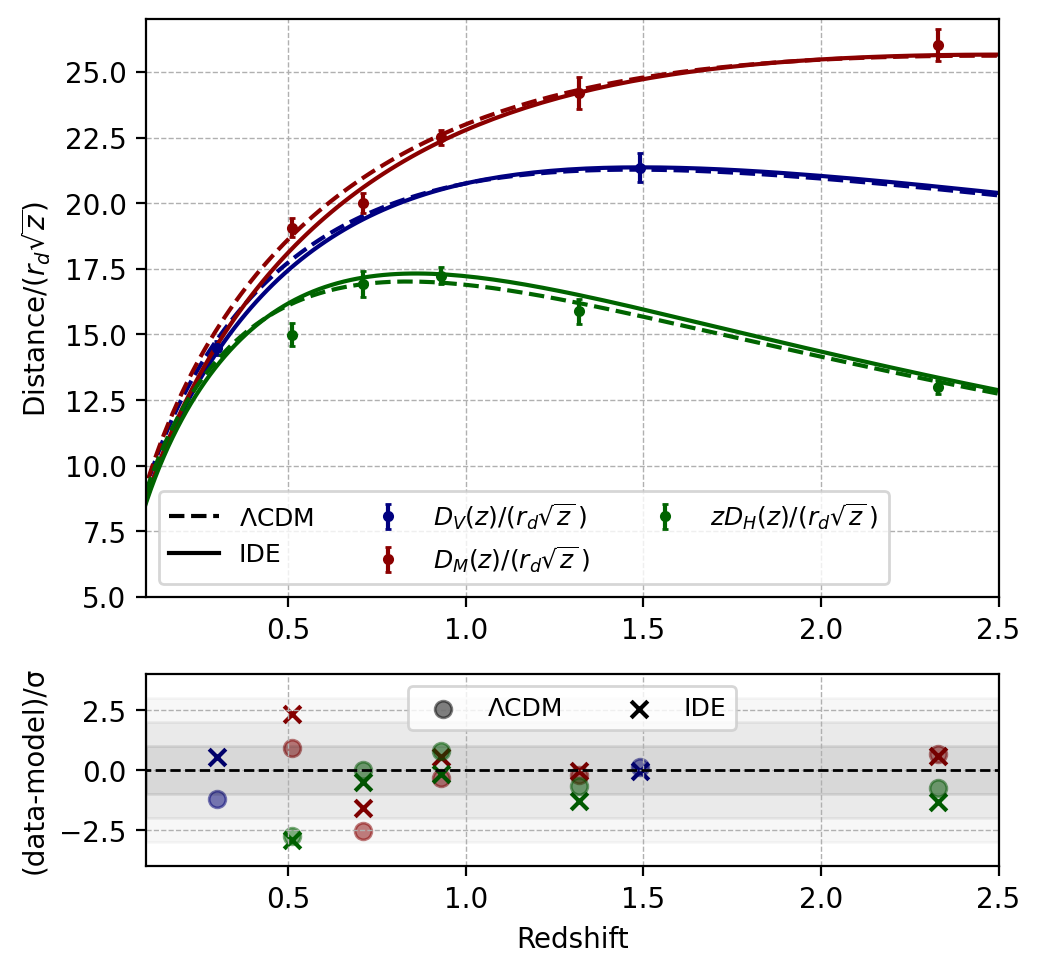

In [17]:
fig, ax = plt.subplots(2,1, figsize = (5.5,5.5),gridspec_kw={'height_ratios': [1.5, 0.5]})

#ax[0].set_title('IDE vs ΛCDM for Planck+BAO')

ax[0].set_xscale('linear')
ax[0].set_yscale('linear')

ax[0].set_xlim(0.1,2.5)
ax[0].set_ylim(5,27)

ax[0].set_ylabel(r'Distance/($r_d \sqrt{z}$)')
ax[1].set_xlabel(r'Redshift')

#data
ax[0].errorbar(datapoint_redshift_obs1,datapoint_quantity_obs1, yerr=datapoint_errors_obs1, alpha=1, color="navy", marker='o', markersize=3, capsize=1, capthick=1,linestyle="none",label=r"$D_V(z)/(r_d \sqrt{z} \,)$")
#bestfit
ax[0].plot(LCDM_distances['z'],LCDM_distances['obs1'],ls='--',c='navy')
ax[0].plot(IDE_distances['z'],IDE_distances['obs1'],ls='-',c='navy')

#data
ax[0].errorbar(datapoint_redshift_obs2 ,datapoint_quantity_obs2, yerr=datapoint_errors_obs2, alpha=1,color="darkred", marker='o', markersize=3, capsize=1, capthick=1,linestyle="none", label=r"$D_M(z)/(r_d\sqrt{z} \,)$")
#bestfit
ax[0].plot(LCDM_distances['z'],LCDM_distances['obs2'],ls='--',c='darkred')
ax[0].plot(IDE_distances['z'],IDE_distances['obs2'],ls='-',c='darkred')

#data
ax[0].errorbar(datapoint_redshift_obs3 ,datapoint_quantity_obs3, yerr=datapoint_errors_obs3, alpha=1,color="darkgreen",  marker='o', markersize=3,capsize=1, capthick=1,linestyle="none", label=r"$z D_H(z) / (r_d\sqrt{z} \,)$")
#bestfit
ax[0].plot(LCDM_distances['z'],LCDM_distances['obs3'],ls='--',c='darkgreen')
ax[0].plot(IDE_distances['z'],IDE_distances['obs3'],ls='-',c='darkgreen')

#Fake plot for legends
ax[0].plot(LCDM_distances['z'],100*LCDM_distances['obs2'],ls='--', c='k', label= r'$\Lambda$CDM')
ax[0].plot(IDE_distances['z'],100*IDE_distances['obs2'], c='k', ls='-', label= r'IDE')

ax[0].legend(ncol=3, fontsize='9')
ax[0].grid(lw=0.5,ls='--')
ax[1].grid(lw=0.5,ls='--')

#(data-D_model)/errors

ax[1].set_xlim(0.1,2.5)
ax[1].set_ylim(-4,4)
ax[1].set_yscale('linear')
ax[1].set_ylabel(r'(data-model)/σ')

ax[1].scatter(datapoint_redshift_obs1,LCDM_reduced_residul_obs1, alpha=0.5, color="navy", marker='o')
ax[1].scatter(datapoint_redshift_obs1,IDE_reduced_residul_obs1, alpha=1, color="navy", marker='x')

ax[1].scatter(datapoint_redshift_obs2,LCDM_reduced_residul_obs2, alpha=0.5, color="darkred", marker='o')
ax[1].scatter(datapoint_redshift_obs2,IDE_reduced_residul_obs2, alpha=1, color="darkred", marker='x')

ax[1].scatter(datapoint_redshift_obs3,LCDM_reduced_residul_obs3, alpha=0.5, color="darkgreen", marker='o')
ax[1].scatter(datapoint_redshift_obs3,IDE_reduced_residul_obs3, alpha=1, color="darkgreen", marker='x')

ax[1].hlines(y=0, xmin=0, xmax=3, color='k', lw=1, ls='--')
ax[1].axhspan(-1,1,color="k",alpha=0.08)
ax[1].axhspan(-2,2,color="k",alpha=0.05)
ax[1].axhspan(-3,3,color="k",alpha=0.03)

#Fake for labels

ax[1].scatter(10,0, alpha=0.5,color="k", marker='o', label="ΛCDM")
ax[1].scatter(10,0, alpha=1,color="k", marker='x', label="IDE")
ax[1].legend(ncol=2, loc='upper center', fontsize='9')
#plt.show()
plt.savefig("BAOs.pdf")